In [1]:
import matplotlib.pyplot as plt
import cv2 as cv
import pandas as pd
import ast

In [2]:
prediction_df = pd.read_csv('test_prediction003.csv')
prediction_df['ground_truth'] = prediction_df.apply(lambda row: ast.literal_eval(row.ground_truth), axis=1)
prediction_df['boxes'] = prediction_df.apply(lambda row: ast.literal_eval(row.boxes), axis=1)
prediction_df['labels'] = prediction_df.apply(lambda row: ast.literal_eval(row.labels), axis=1)


In [3]:
prediction_df

filename  width  height     class  xmin  ymin  xmax  ymax  image_id  \
0   2-5398.jpg   1280     720  starfish   179   156   228   203         0   
1   1-9381.jpg   1280     720  starfish   438   681   521   720         1   
2   2-5456.jpg   1280     720  starfish     4   643    63   698         2   
3   2-5843.jpg   1280     720  starfish  1080   620  1164   678         3   
4   2-6368.jpg   1280     720  starfish   169   145   202   173         4   
5   1-9243.jpg   1280     720  starfish   105   654   150   699         5   
6   2-7967.jpg   1280     720  starfish   514   299   549   319         6   
7   2-5439.jpg   1280     720  starfish   186   352   235   399         7   
8   2-8865.jpg   1280     720  starfish   448   597   508   636         8   
9   2-5508.jpg   1280     720  starfish   246   607   287   646         9   
10  1-9238.jpg   1280     720  starfish   273   689   321   719        10   
11  2-8866.jpg   1280     720  starfish   444   618   506   657        11   
12  2-6335.jpg   1280     720  starfish   334    67   361    94        12   
13  1-9153.jpg   1280     720  starfish   461   116   499   157        13   
14  2-5728.jpg   1280     720  starfish   765    88   809   118        14   
15  1-9320.jpg   1280     720  starfish   623   507   664   553        15   
16  2-6250.jpg   1280     720  starfish   515   152   551   189        16   
17  2-6373.jpg   1280     720  starfish   150   201   183   229        17   
18  2-6410.jpg   1280     720  starfish     2   472    47   512        18   
19  1-9194.jpg   1280     720  starfish   437   482   490   534        19   

                                               labels  \
0   [starfish, starfish, starfish, starfish, starf...   
1   [starfish, starfish, starfish, starfish, starf...   
2   [starfish, starfish, starfish, starfish, starf...   
3   [starfish, starfish, starfish, starfish, starf...   
4   [starfish, starfish, starfish, starfish, starf...   
5   [starfish, starfish, starfish, starfish, starf...   
6   [starfish, starfish, starfish, starfish, starf...   
7   [starfish, starfish, starfish, starfish, starf...   
8   [starfish, starfish, starfish, starfish, starf...   
9                      [starfish, starfish, starfish]   
10  [starfish, starfish, starfish, starfish, starf...   
11                                         [starfish]   
12  [starfish, starfish, starfish, starfish, starf...   
13  [starfish, starfish, starfish, starfish, starf...   
14  [starfish, starfish, starfish, starfish, starf...   
15  [starfish, starfish, starfish, starfish, starf...   
16  [starfish, starfish, starfish, starfish, starf...   
17           [starfish, starfish, starfish, starfish]   
18                     [starfish, starfish, starfish]   
19           [starfish, starfish, starfish, starfish]   

                                                boxes  \
0   [[761, 59, 794, 96], [886, 136, 927, 172], [26...   
1   [[1209, 213, 1270, 270], [526, 400, 560, 447],...   
2   [[334, 214, 379, 246], [443, 196, 471, 228], [...   
3   [[728, 319, 766, 357], [813, 635, 850, 664], [...   
4   [[1177, 558, 1226, 628], [470, 345, 503, 384],...   
5   [[454, 587, 491, 612], [434, 150, 470, 179], [...   
6   [[1224, 1, 1259, 21], [995, 26, 1043, 55], [71...   
7   [[974, 534, 1013, 565], [224, 147, 257, 182], ...   
8   [[459, 594, 499, 629], [0, 0, 55, 36], [360, 0...   
9   [[498, 554, 528, 585], [154, 124, 206, 175], [...   
10  [[1145, 441, 1209, 501], [529, 634, 597, 702],...   
11                                [[0, 271, 33, 310]]   
12  [[613, 463, 649, 517], [1235, 376, 1276, 447],...   
13  [[619, 364, 670, 413], [813, 560, 879, 627], [...   
14  [[885, 100, 928, 146], [401, 591, 437, 624], [...   
15  [[306, 558, 358, 597], [622, 413, 655, 443], [...   
16  [[574, 4, 626, 41], [585, 1, 614, 37], [1220, ...   
17  [[780, 511, 807, 550], [328, 252, 361, 280], [...   
18  [[1180, 220, 1237, 275], [219, 565, 256, 597],...   
19  [[371, 438, 418, 478], [441, 492, 484, 515], [

In [4]:
all_pred_img = []
for n in range(len(prediction_df)):
    img = cv.imread('allImageFolder/'+prediction_df.at[n,'filename'])
    cv.imshow("prediction_df.at[n,'filename']" ,img)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    start_xy = (prediction_df.at[n,'ground_truth'][0], prediction_df.at[n,'ground_truth'][1])
    end_xy = (prediction_df.at[n,'ground_truth'][2], prediction_df.at[n,'ground_truth'][3])
    groundTruthColour = (255, 0, 0)
    cv.rectangle(img,start_xy,end_xy,groundTruthColour,2)
    font = cv.FONT_HERSHEY_SIMPLEX
    cv.putText(img,'Ground Truth', start_xy, font, 1, groundTruthColour, 2, cv.LINE_AA)
    for coordinate in prediction_df.at[n,'boxes']:
        boxes_start = (coordinate[0], coordinate[1])
        boxes_end = (coordinate[2], coordinate[3])
        boxesColour = (255, 255, 255)
        cv.rectangle(img,boxes_start,boxes_end,boxesColour,2)
        font = cv.FONT_HERSHEY_SIMPLEX
        cv.putText(img,'Starfish', boxes_start, font, 1, boxesColour, 2, cv.LINE_AA)
        cv.putText(img,f"{len(prediction_df.at[n,'boxes'])} COTS detected",(0,600), font, 2,boxesColour,3,cv.LINE_AA)
    all_pred_img.append(img)

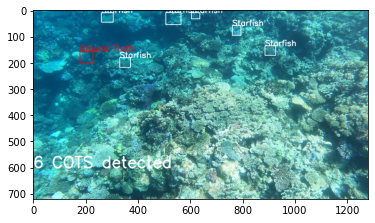

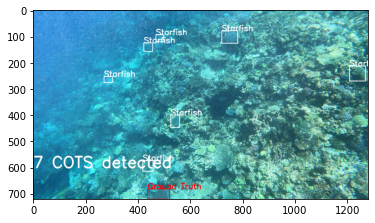

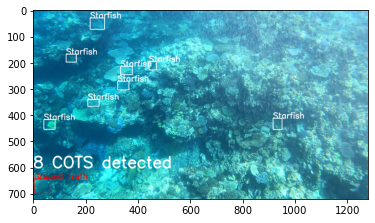

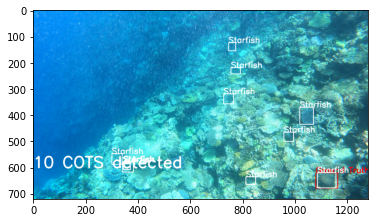

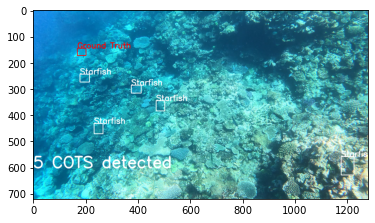

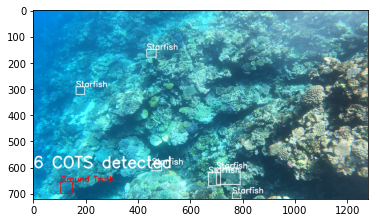

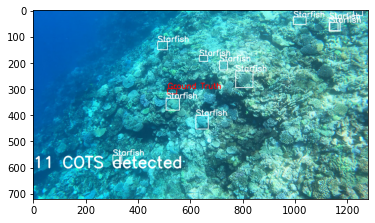

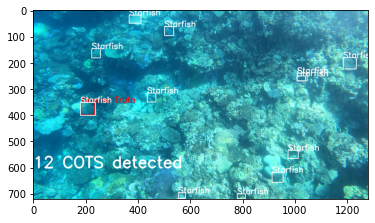

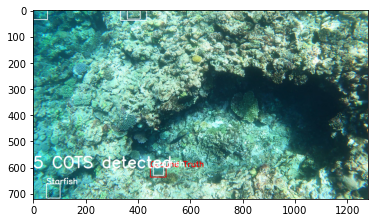

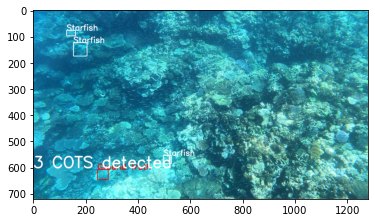

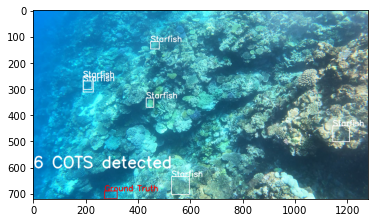

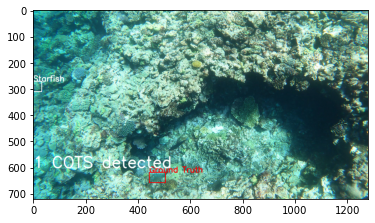

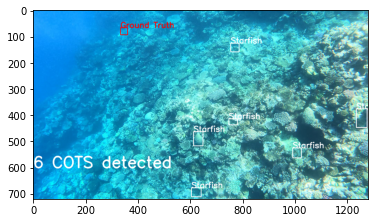

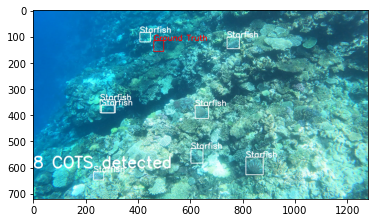

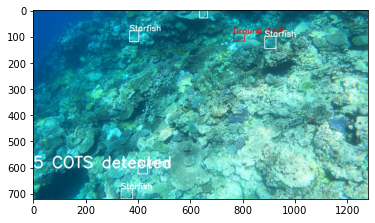

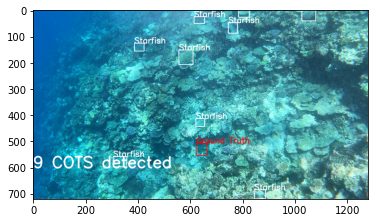

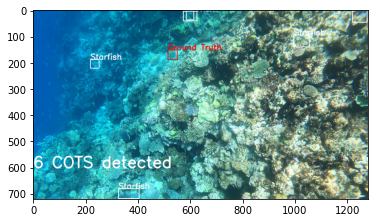

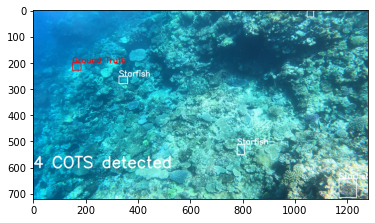

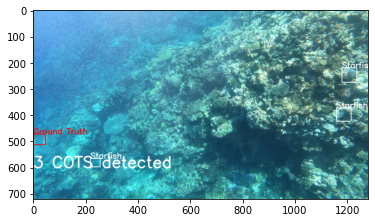

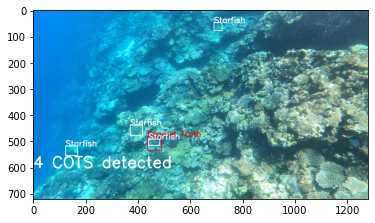

In [5]:
for i, image in enumerate(all_pred_img):
    plt.figure()
    plt.imshow(image)